# Mathematical derivation versus computational estimation

We illustrated in the previous sections how to approach a simple problem using either mathematics or simulations (a computational solution).
There are many examples of scientitfic problems where advances have been made using either  computational or mathematical solutions or both. For example, in meteorology (**expand here**):

- Mathematical models of precipitation levels
- Simulations of local weather patterns

The debate of the merits of these two approaches is beyong the scope of this textbook (but it can lead to a stimulating classroom discussion), but we would like to note that there are problems where analytical derivations are preferred and problems where computational solutions are optimal. For example, when calculating the probability of winning a lottery where the number of combinations is very large (for example, hundreds of millions), a mathematical derivation works better because the estimation of very rare events require an enormous number of repetitions. Below we show a generalization of the birthday problem where the code is almost identical to what we introduced above, while a mathematical derivation is a lot more difficult.

## The triplets problem

Given a number of people, $n$, what is the probability that at least three share a birthday? Assumptions are the same as before:

* 365 days in a year.

* All days are equally likely.

* Subjects have independent birthdays.

The exact formula for this probability is a lot more complicated than the one for the classical birthday problem (see reference below). The next cell constructs a DataFrame with the estimated probabilities for a range of $n$ values. Note that the only difference in the code is when we count the number of repetitions where the most frequenct birthday count is larger or equal than 3.

In [1]:
import random
from collections import Counter

import numpy as np
import pandas as pd


birthdays = range(1, 366)

def birthday_sim(n, nrep):
    '''Estimate birthday matching probabilities using nrep simulations.'''
    return np.array([
        Counter(random.choices(birthdays, k=n)).most_common(1)[0][1]
        for _rep in range(nrep)
    ])


nrep = 1000

number_people = range(40, 61)

probs3 = [
    sum(birthday_sim(number, nrep) >= 3) / nrep
    for number in number_people
]

Birthday3_probs = pd.DataFrame(
    {
        "Triplet Probability": probs3,
    },
    index=pd.Index(number_people, name="Number of people")
)

Birthday3_probs.tail(5)

,Triplet Probability
Number of people,
56,0.183
57,0.188
58,0.174
59,0.201
60,0.187


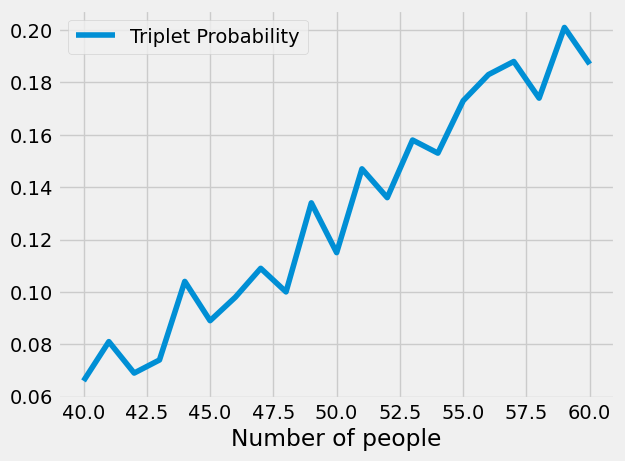

In [2]:
import matplotlib.pyplot as plots


plots.style.use('fivethirtyeight')


Birthday3_probs.plot();

If you want to obtain a smoother curve (reflecting a more accurate estimation of probabilities) you need to increase the number of simulations. Play with the code and see how the number of simulations affects the smoothness of the function!

Note that for triplets, the number of people that yields a probability closest to 0.5 is 87.

In [3]:
n = 87
nrep = 10000

sum(birthday_sim(n, nrep) >= 3) / nrep

0.5013

Reference for the triplets problem:

DasGupta A (2005) The matching, birthday and the strong birthday problem: a contemporary review. Journal of Statistical Planning and Inference, Volume 130, Issues 1–2, 377-389.